In [1]:
#!pip install matplotlib
#!pip install numpy

In [2]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

# 1 Charger de la donnée

Dans ce notebook, nous allons étudier un dataset représentant la fréquentation quotidienne de 7 pistes cyclables Montréalaises en 2012.

Charger le dataset bikes.csv en utilisant la méthode `read_csv` de pandas. 

Jetez un coup d'oeil à la documentation => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [3]:
df = pd.read_csv("C:/Users/marie/Documents/AURA/Formation/cours ipssi/OpenData/TD_individuel/data/bikes.csv")

Afficher les 3 premières lignes.

In [4]:
df.head(3)

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


Comme on peut le voir, le dataset n'est pas proprement chargé, toutes les colonnes sont reunies en une. Pour arranger ceci, nous allons utiiser quelques arguments de la méthode `read_csv`.

* changer le separateur de colonne a `;` avec l'option `sep`
* "Parser" la collone date avec l'option `parse_dates`
* Definir la colonne 'Date' comme index du dataframe avec `index_col`

In [6]:
df = pd.read_csv("C:/Users/marie/Documents/AURA/Formation/cours ipssi/OpenData/TD_individuel/data/bikes.csv", encoding ="ISO-8859-1", sep=';', parse_dates=True, index_col='Date')

In [7]:
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN


In [8]:
df.dtypes

Berri 1                                  int64
Brébeuf (données non disponibles)      float64
Côte-Sainte-Catherine                    int64
Maisonneuve 1                            int64
Maisonneuve 2                            int64
du Parc                                  int64
Pierre-Dupuy                             int64
Rachel1                                  int64
St-Urbain (données non disponibles)    float64
dtype: object

# 1.1 Sélection d'une colonne

On peut selectionner une colonne (ou plusieurs) d'un dataframe de la même manière que l'on slectionne une clé dans un dictionnaire :
`df['column_name']` or `df[['col1', 'col2', etc]]`

Selectionner la colonne 'Berri 1'

In [9]:
freq_berri = df['Berri 1']
freq_berri

Date
2012-01-01      35
2012-02-01      83
2012-03-01     135
2012-04-01     144
2012-05-01     197
              ... 
2012-01-11    2405
2012-02-11    1582
2012-03-11     844
2012-04-11     966
2012-05-11    2247
Name: Berri 1, Length: 310, dtype: int64

In [10]:
clean_data = df[['Berri 1', 'Côte-Sainte-Catherine', 'Maisonneuve 1', 'Maisonneuve 2', 'du Parc', 'Pierre-Dupuy', 'Rachel1' ]]
clean_data

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-02-01,83,1,68,153,53,6,43
2012-03-01,135,2,104,248,89,3,58
2012-04-01,144,1,116,318,111,8,61
2012-05-01,197,2,124,330,97,13,95
...,...,...,...,...,...,...,...
2012-01-11,2405,1208,1701,3082,2076,165,2461
2012-02-11,1582,737,1109,2277,1392,97,1888
2012-03-11,844,380,612,1137,713,105,1302


# 1.2 "Plotter" une colonne

Utiliser la méthode `.plot()` pour produire une graphique de la frequentation de la piste tout au long de l'année.

On remarque sans surprise que peu de gens prennent le vélo en hiver.

<AxesSubplot:xlabel='Date'>

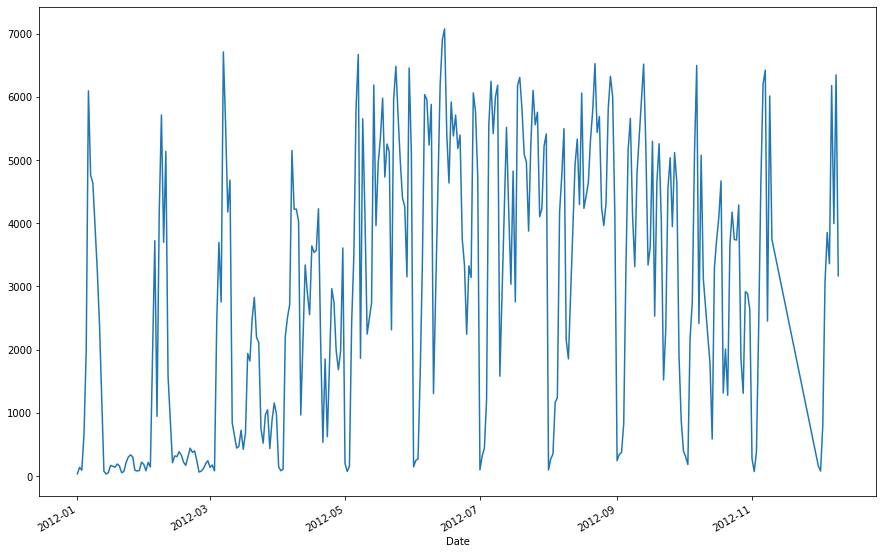

In [11]:
df['Berri 1'].plot()

On peut aussi plotter toutes les colonnes du dataframe en utilisant le même mechanisme.

<AxesSubplot:xlabel='Date'>

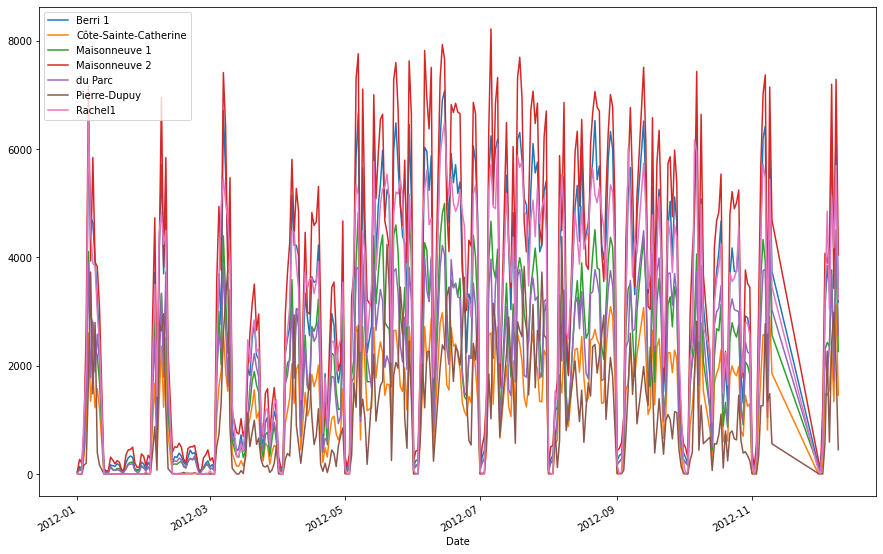

In [12]:
clean_data.plot()

Cependant, c'est un peu illisible... Utiliser l'option `subplots=True` pour séparer les courbes.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

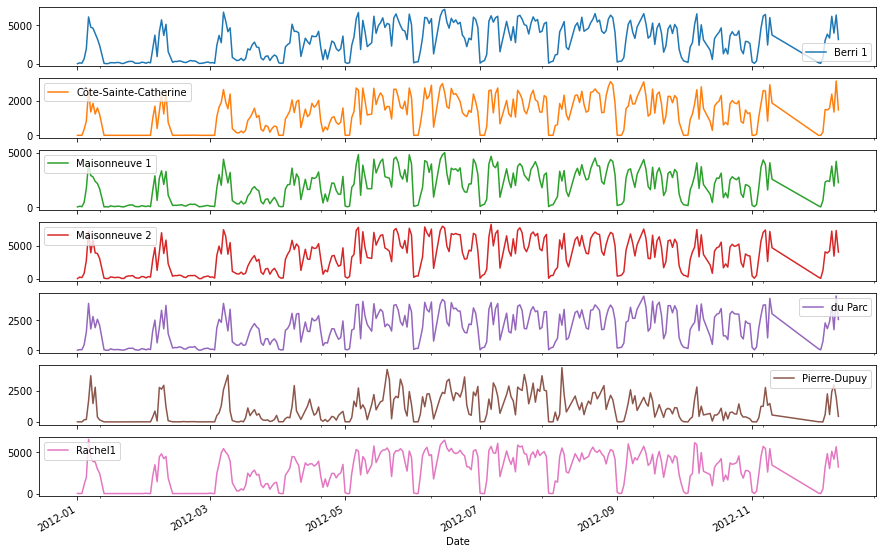

In [13]:
clean_data.plot(subplots=True)

# 2 Premières analyses

Dans cette partie nous allons utiliser un nouveau jeu de données plus volumineux, représentant les appels au service 311 de la ville de New York.

Charger le fichier '311-service-requests.csv' dans un dataframe pandas.

In [14]:
pd.set_option("display.max_columns", 60)

In [15]:
df = pd.read_csv('C:/Users/marie/Documents/AURA/Formation/cours ipssi/OpenData/TD_individuel/data/311-service-requests.csv', index_col='Unique Key')
df

c:\users\marie\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure 

In [16]:
df.shape

(111069, 51)

# 2.1 Description du df

Explore the dataframe set with methods like .info(), .describe()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111069 entries, 26589651 to 26428033
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    111069 non-null  object 
 1   Closed Date                     60270 non-null   object 
 2   Agency                          111069 non-null  object 
 3   Agency Name                     111069 non-null  object 
 4   Complaint Type                  111069 non-null  object 
 5   Descriptor                      110613 non-null  object 
 6   Location Type                   79022 non-null   object 
 7   Incident Zip                    98807 non-null   object 
 8   Incident Address                84441 non-null   object 
 9   Street Name                     84432 non-null   object 
 10  Cross Street 1                  84728 non-null   object 
 11  Cross Street 2                  84005 non-null   object 
 12  Interse

In [18]:
df.describe()

,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,9.814300e+04,98143.000000,0.0,98143.000000,98143.000000
mean,1.004544e+06,205553.153287,NaN,40.730821,-73.926738
std,2.206087e+04,31334.677543,NaN,0.086006,0.079563
min,9.134950e+05,121152.000000,NaN,40.498949,-74.254437
25%,9.920490e+05,182506.000000,NaN,40.667529,-73.971882
50%,1.003205e+06,203251.000000,NaN,40.724521,-73.931580
75%,1.016823e+06,233366.000000,NaN,40.807183,-73.882430
max,1.067024e+06,271485.000000,NaN,40.911792,-73.701278


In [19]:
df['Complaint Type'].describe()

count      111069
unique        165
top       HEATING
freq        14200
Name: Complaint Type, dtype: object

# 2.2 Sélectionner des colonnes et des lignes

Selectionner la colonne 'Complaint Type'.

In [20]:
df['Complaint Type']

Unique Key
26589651    Noise - Street/Sidewalk
26593698            Illegal Parking
26594139         Noise - Commercial
26595721            Noise - Vehicle
26590930                     Rodent
                     ...           
26426013    Maintenance or Facility
26428083            Illegal Parking
26428987    Noise - Street/Sidewalk
26426115         Noise - Commercial
26428033           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

In [21]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Rodent', 'Blocked Driveway',
       'Noise - House of Worship', 'Street Light Condition',
       'Harboring Bees/Wasps', 'Taxi Complaint', 'Homeless Encampment',
       'Traffic Signal Condition', 'Food Establishment', 'Noise - Park',
       'Broken Muni Meter', 'Benefit Card Replacement',
       'Sanitation Condition', 'ELECTRIC', 'PLUMBING', 'HEATING',
       'GENERAL CONSTRUCTION', 'Street Condition', 'Consumer Complaint',
       'Derelict Vehicles', 'Noise', 'Drinking', 'Indoor Air Quality',
       'Panhandling', 'Derelict Vehicle', 'Lead', 'Water System',
       'Noise - Helicopter', 'Homeless Person Assistance',
       'Root/Sewer/Sidewalk Condition', 'Sidewalk Condition', 'Graffiti',
       'DOF Literature Request', 'Animal in a Park',
       'Overgrown Tree/Branches', 'Air Quality', 'Dirty Conditions',
       'Water Quality', 'Other Enforcement', 'Collection Truck Noise',
     

Afficher les 5 premieres ligne de la colonne 'Complaint Type'.

In [22]:
df['Complaint Type'].head(5)

Unique Key
26589651    Noise - Street/Sidewalk
26593698            Illegal Parking
26594139         Noise - Commercial
26595721            Noise - Vehicle
26590930                     Rodent
Name: Complaint Type, dtype: object

In [23]:
heat = df.loc[(df['Complaint Type']=='HEATING')]
heat

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26591688,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10453.0,150 WEST 179 STREET,WEST 179 STREET,ANDREWS AVENUE,LORING PLACE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Open,NaN,10/31/2013 12:00:00 AM,05 BRONX,BRONX,1008161.0,250940.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.855415,-73.913565,"(40.855414830918306, -73.91356461276855)"
26593638,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10456.0,1175 MORRIS AVENUE,MORRIS AVENUE,MC CLELLAN STREET,EAST 167 STREET,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Open,NaN,10/31/2013 12:00:00 AM,04 BRONX,BRONX,1007903.0,242609.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.832549,-73.914527,"(40.83254938306124, -73.9145266364985)"
26594900,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10469.0,917 MACE AVENUE,MACE AVENUE,BRONXWOOD AVENUE,RADCLIFF AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Open,NaN,10/31/2013 12:00:00 AM,11 BRONX,BRONX,1022722.0,253760.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863103,-73.860912,"(40.86310343131708, -73.86091223589236)"
26591211,10/31/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10032.0,505 WEST 161 STREET,WEST 161 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Open,NaN,10/31/2013 12:00:00 AM,12 MANHATTAN,MANHATTAN,1000659.0,243705.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835574,-73.940701,"(40.83557401610241, -73.94070113438576)"
26593331,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11206.0,33 MONTROSE AVENUE,MONTROSE AVENUE,NEW MONTROSE AVENUE,LORIMER STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,NaN,10/30/2013 12:00:00 AM,01 BROOKLYN,BROOKLYN,998422.0,196786.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706798,-73.948884,"(40.70679752211721, -73.94888414735604)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26441563,10/05/2013 12:00:00 AM,10/08/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10472.0,1742 EAST 172 STREET,EAST 172 STREET,ROSEDALE AVENUE,COMMONWEALTH AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,NaN,10/08/20

# 2.3 Sélection de plusieurs colonnes

Afficher tous les noms de colonnes en utilisant l'attribut columns.values

In [24]:
df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Lati

Créer un nouveaux dataset en selectionnant les colonnes 'Created Date', 'Closed Date', 'Complaint Type', 'Incident Address' et 'Street Name'

In [25]:
data = df[['Created Date', 'Closed Date', 'Complaint Type', 'Incident Address', 'Street Name']]

In [26]:
data

,Created Date,Closed Date,Complaint Type,Incident Address,Street Name
Unique Key,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,Noise - Street/Sidewalk,90-03 169 STREET,169 STREET
26593698,10/31/2013 02:01:04 AM,NaN,Illegal Parking,58 AVENUE,58 AVENUE
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,Noise - Commercial,4060 BROADWAY,BROADWAY
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,Noise - Vehicle,WEST 72 STREET,WEST 72 STREET
26590930,10/31/2013 01:53:44 AM,NaN,Rodent,WEST 124 STREET,WEST 124 STREET
...,...,...,...,...,...
26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,Maintenance or Facility,NaN,NaN
26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,Illegal Parking,NaN,NaN
26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,Noise - Street/Sidewalk,344 EAST 28 STREET,EAST 28 STREET


# 2.4 Quelle est la plainte qui revient le plus souvent?

Utiliser la méthode groupby pour compter le nombre de plaintes pour chaque type de plainte.

In [27]:
df['Complaint Type'].value_counts().head(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

In [41]:
data = df.groupby(['Complaint Type'])['Created Date'].count()
data

Complaint Type
APPLIANCE                   445
Adopt-A-Basket                3
Agency Issues               174
Air Quality                 459
Animal Abuse                164
                           ... 
Water Conservation          130
Water Quality                89
Water System               2636
Window Guard                  2
X-Ray Machine/Equipment       1
Name: Created Date, Length: 165, dtype: int64

utiliser la methode .sort() et afficher le top 10 des types de plainte avec le plus d'enregistremments.

In [42]:
plot_data = data.sort_values(ascending=False).head(10)
plot_data

Complaint Type
HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Created Date, dtype: int64

In [43]:
type(plot_data)

pandas.core.series.Series

Utiliser matplotlib pour produire un graphique en barre de ce top 10.

In [44]:
df_data = pd.DataFrame(plot_data)
df_data = df_data.reset_index()

In [45]:
df_data

,Complaint Type,Created Date
0,HEATING,14200
1,GENERAL CONSTRUCTION,7471
2,Street Light Condition,7117
3,DOF Literature Request,5797
4,PLUMBING,5373
5,PAINT - PLASTER,5149
6,Blocked Driveway,4590
7,NONCONST,3998
8,Street Condition,3473
9,Illegal Parking,3343


In [46]:
val = df_data['Created Date']

In [47]:
label = df_data['Complaint Type']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

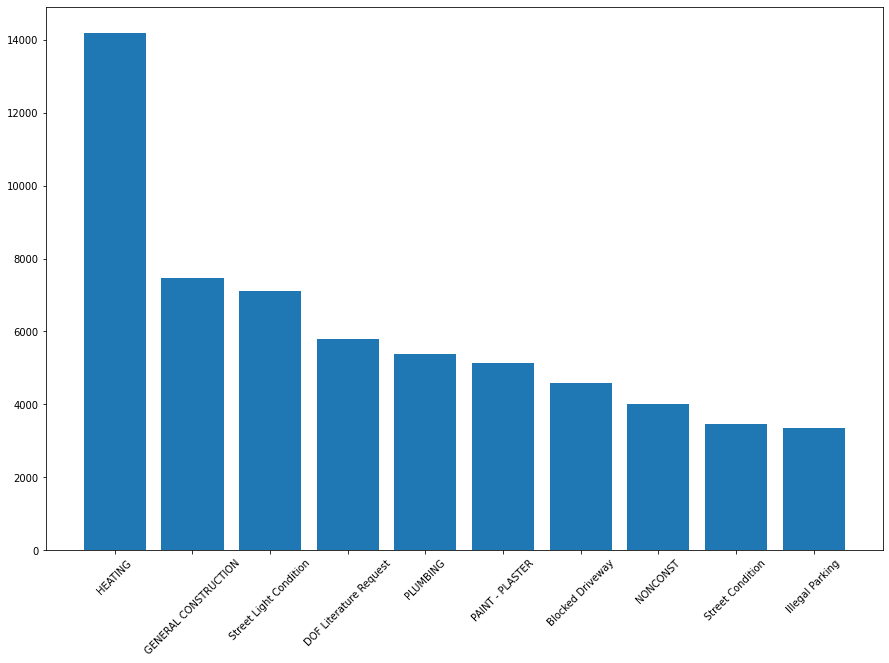

In [51]:
plt.bar(label, val)
plt.xticks(rotation = 45)

Utiliser la librairie matplotlib pour produire un camenbert avec les pourcentages représentant la proportion de chaque type de plainte.

([<matplotlib.patches.Wedge at 0x1de89e25f48>,
 [Text(0.8143657388933692, 0.7394649709869002, 'HEATING'),
  Text(-0.31617446295784574, 1.053581372734597, 'GENERAL CONSTRUCTION'),
  Text(-0.9535736007480854, 0.5483588131473144, 'Street Light Condition'),
  Text(-1.0878791279936673, -0.1628465623700373, 'DOF Literature Request'),
  Text(-0.8207844232590245, -0.7323338927943664, 'PLUMBING'),
  Text(-0.3208754765378311, -1.0521591745342622, 'PAINT - PLASTER'),
  Text(0.22889459926769312, -1.0759215874895727, 'Blocked Driveway'),
  Text(0.670499934431386, -0.8720262828192206, 'NONCONST'),
  Text(0.9505126256524042, -0.5536476753995926, 'Street Condition'),
  Text(1.0834736716369193, -0.1899600033417906, 'Illegal Parking')],
 [Text(0.44419949394183766, 0.40334452962921824, '23.5%'),
  Text(-0.17245879797700675, 0.5746807487643256, '12.3%'),
  Text(-0.5201310549535011, 0.29910480717126237, '11.8%'),
  Text(-0.593388615269273, -0.08882539765638398, '9.6%'),
  Text(-0.4477005945049224, -0.39945

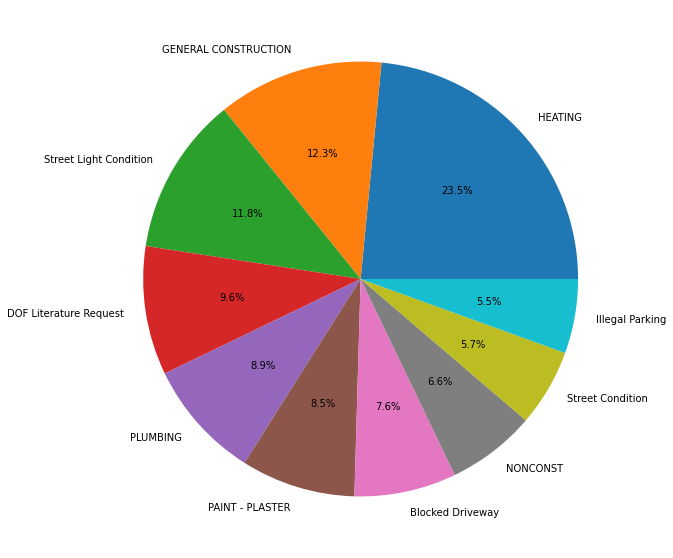

In [55]:
plt.pie(val, labels = label, autopct='%1.1f%%')

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  